Machine Learning (IE406)\
Assignment 4\
Lukhi Krunalumar- 201901449

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv 
import statistics as st
from google.colab import files
upload = files.upload()

MessageError: ignored

Importing training data form csv file

In [ ]:
file = open("Admission_Predict.csv", 'r')
f = csv.DictReader(file)

score = []
chance = []
tscore = []
for col in f:
  score.append(float(col["GRE Score"]))
  chance.append(float(col["Chance of Admit "]))
  tscore.append(float(col["TOEFL Score"]))


Feature normalization for Part II

In [ ]:
x1 = np.array(score)
x2 = np.array(tscore)
y = np.array(chance)

mean1=st.mean(x1)
mean2=st.mean(x2)
var1=st.stdev(x1)
var2=st.stdev(x2)
x1_std=(x1-mean1)/var1
x2_std=(x2-mean2)/var2

print(x1_std)

[ 1.75990263  0.62687135 -0.07037867  0.45255884 -0.24469118  1.14980886
  0.36540259 -0.7676287  -1.29056621  0.53971509  0.7140276   0.88834011
  0.97549636 -0.85478495 -0.50615994 -0.24469118  0.01677758  0.19109008
  0.10393383 -1.20340996 -0.41900368  0.7140276   0.97549636  1.49843387
  1.67274638  2.02137139  0.45255884 -1.63919122 -1.90065998 -0.59331619
 -1.46487872  0.88834011  1.84705889  2.02137139  1.23696512  0.27824634
 -1.55203497 -1.46487872 -1.11625371 -0.85478495 -0.7676287  -0.07037867
 -0.33184743  1.32412137  0.80118385  0.45255884  1.06265261  1.93421514
  0.36540259  0.88834011 -0.33184743 -0.41900368  1.49843387  0.62687135
  0.45255884  0.27824634 -0.07037867 -1.63919122 -1.46487872 -0.50615994
 -0.68047244 -0.85478495 -1.11625371 -0.15753493  0.7140276   0.7140276
  0.88834011 -0.07037867  0.10393383  0.97549636  1.32412137  1.67274638
  0.36540259 -0.24469118 -0.24469118  1.06265261  0.88834011 -1.37772246
 -1.81350373 -1.98781623 -0.41900368  2.02137139  0.

Scatter plot for Part I

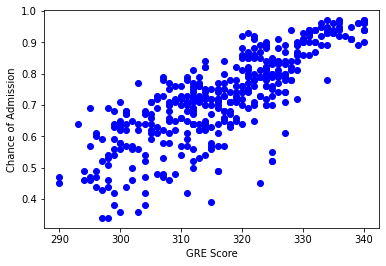

In [ ]:
plt.figure()
plt.scatter(x1,y,c="blue")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.show()

Scatter plot for Part II

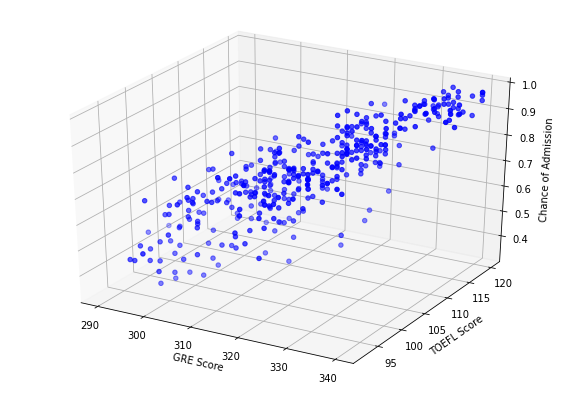

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x1, x2, y, color = "blue",)
ax.set_xlabel("GRE Score")
ax.set_ylabel("TOEFL Score")
ax.set_zlabel("Chance of Admission")
plt.show()

Linear Regression for PART I

In [ ]:
def Regrassion(x,y):
  m=1
  c=-2
  l=0.000001
  lam=100
  n=float(len(x))
  cost=[]
  for i in range(1000):
    y_pred=m*x+c
    cur_cost=(np.sum((y-y_pred)**2)+lam*abs(m))/n
    cost.append(cur_cost)
    if m>0:
      md=((-2) * sum(x * (y-y_pred))+lam)/n
    else:
      md=((-2) * sum(x * (y-y_pred))-lam)/n
    cd=(-1/n) * sum(y-y_pred)
    m=m-l*md
    c=c-l*cd
  return [m,c,cost]



Ploting fit Line and cost function for Part I

θ₀ = -2.0015627941416985
θ₁ = 0.008604867346957411


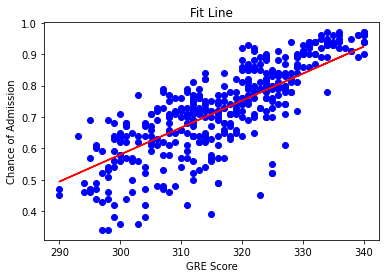

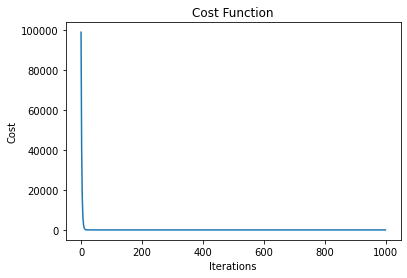

In [ ]:

[m,c,cost]=Regrassion(x1,y)

print("\u03B8\u2080 = "+str(c)+"\n\u03B8\u2081 = "+str(m))

y_pred=m*x1+c

plt.figure()
plt.scatter(x1,y,c='blue')
plt.plot(x1,y_pred,c='red')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.title("Fit Line")
plt.show()

plt.figure()
plt.plot(range(1000),cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function")
plt.show()

Prediction for Part 1

In [ ]:
gre_test=np.random.randint(low=290,high=340,size=(10,1))
test_pred=m*gre_test+c
print(test_pred)

[[0.78641423]
 [0.78641423]
 [0.60571201]
 [0.72618015]
 [0.64013148]
 [0.74338989]
 [0.70897042]
 [0.91548724]
 [0.57129254]
 [0.91548724]]


Linear Regrassion  for Part II

In [ ]:
def Multiple_Regrassion(x1,x2,y):
  m1=0.0
  m2=0.0
  c=0
  lam=10
  l=0.001
  n=float(len(x1))
  cost=[]
  for i in range(10000):
    y_pred=m1*x1+m2*x2+c
    cur_cost=(np.sum((y-y_pred)**2)+lam*(abs(m1)+abs(m2)))/n
    cost.append(cur_cost)
    if m1>0:
      m1d=((-2) * sum(x1 * (y-y_pred))+lam)/n
    else:
      m1d=((-2) * sum(x1 * (y-y_pred))-lam)/n
    if m2>0:
      m2d=((-2) * sum(x2 * (y-y_pred))+lam)/n
    else:
      m2d=((-2) * sum(x2 * (y-y_pred))-lam)/n
    cd=(-2/n) * sum(y-y_pred)
    m1=m1-l*m1d
    m2=m2-l*m2d
    c=c-l*cd
  return [m1,m2,c,cost]



Ploting cost function for Part II

θ₀ = 0.7243499985366058
θ₁ = 0.05969701991663451
θ₂ = 0.05048180767281392


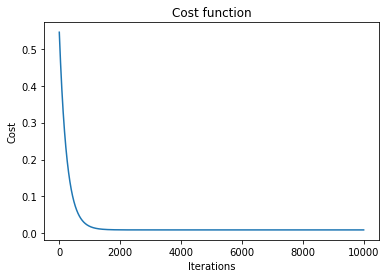

In [ ]:
[m1,m2,c1,cost]=Multiple_Regrassion(x1_std,x2_std,y)
y_pred=m1*x1+m2*x2+c1

print("\u03B8\u2080 = "+str(c1)+"\n\u03B8\u2081 = "+str(m1)+"\n\u03B8\u2082 = "+str(m2))
plt.figure()
plt.plot(range(10000),cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function")
plt.show()

Prediction of Part 2

In [ ]:
tg=np.random.randint(low=290,high=340,size=(10))
tg=(tg-st.mean(tg))/st.stdev(tg)
tt=np.random.randint(low=90,high=120,size=(10))
tt=(tt-st.mean(tt))/st.stdev(tt)
tp=m1*tg+m2*tt+c1
print(tp)



[0.64798629 0.78272763 0.71687474 0.83405612 0.69243202 0.67344763
 0.73728358 0.77769543 0.76181963 0.66336292]
